In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

b1 = pd.read_csv("data/yolov5x_backfin_train.csv")
b2 = pd.read_csv("data/backfin_train_v2.csv")

In [23]:
print((b1["predictions"] == "[]").sum(), (b2["predictions"] == "[]").sum())
b = b1.merge(b1, on="image", how="left")
nobox = b[(b["predictions_x"] == "[]") | (b["predictions_y"] == "[]")]
nobox["image"] = nobox["image"].apply(os.path.basename)

492 467


C:\Users\msi\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


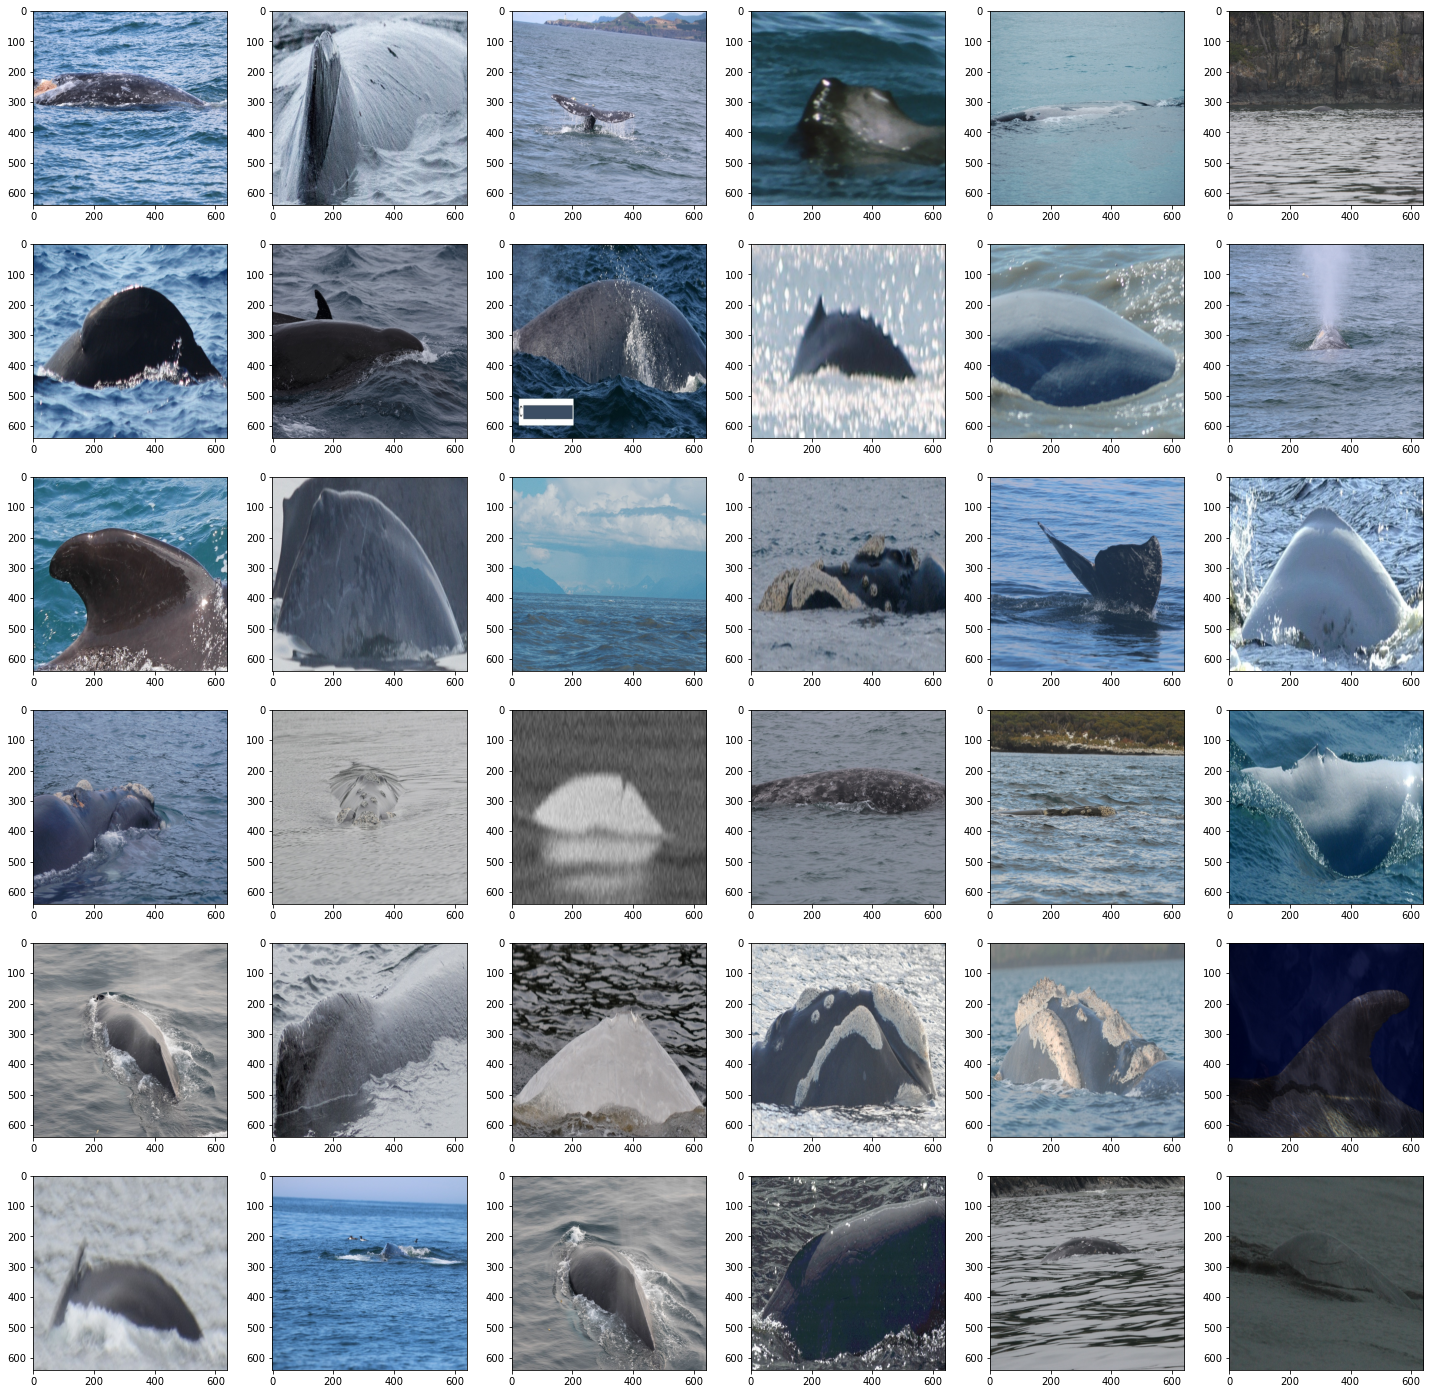

In [26]:
cols = 6
rows = 6
fig = plt.figure(figsize=(25, 25))
for i, (_, row) in enumerate(nobox.sample(cols * rows).iterrows()):
    img = cv2.imread(f'D:/whale_full_640/images/{row["image"]}')[:,:,::-1]
    assert img is not None, row["image"]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
plt.show()